# Future Years

PyPSA-GB can model the GB power system  by solving a network constrained Linear Optimal Power Flow (LOPF) problem. This notebook shows the example application of a FES 2022.

In [1]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
import pypsa
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.style.use('ggplot')
import pandas as pd
import cartopy.crs as ccrs
import data_reader_writer

## Setting up simulation

Set the required inputs for the LOPF: the start, end and year of simulation, and the timestep.

The HVDC links used as an interconnector for import and export between GB and nearby regions such as Norway, N.Ireland, France are disregarded in this optimal economic dispatch analysis.

In [3]:
df_network=pd.read_csv('LOPF_data_heat_2022/buses.csv')
cols=df_network.name.values[29:].tolist()
cols=['Timestamp']+cols
cols

['Timestamp',
 'Beauly',
 'Peterhead',
 'Errochty',
 'Denny/Bonnybridge',
 'Neilston',
 'Strathaven',
 'Torness',
 'Eccles',
 'Harker',
 'Stella West',
 'Penwortham',
 'Deeside',
 'Daines',
 'Th. Marsh/Stocksbridge',
 'Thornton/Drax/Eggborough',
 'Keadby',
 'Ratcliffe',
 'Feckenham',
 'Walpole',
 'Bramford',
 'Pelham',
 'Sundon/East Claydon',
 'Melksham',
 'Bramley',
 'London',
 'Kemsley',
 'Sellindge',
 'Lovedean',
 'S.W.Penisula']

In [4]:
network = pypsa.Network()
network.import_from_csv_folder('LOPF_data_electricityonly_2035')

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
INFO:pypsa.io:Imported network LOPF_data_electricityonly_2035 has buses, generators, lines, loads, storage_units


A boiler at each heat nodes is integrated and added as a generator compoenent which is used as a back up heating source to the storage and the heat pump units to meet the hour by hour heat demand for the yearly operating period. The nominal capcity of the boiler is allwed to be extendable so that the optimisation algorithm will dispatch the needed optimal back up boiler capcity.

Links need to be scaled up to accomadate for future generation.

In [5]:
contingency_factor = 0.7
network.lines.s_max_pu *= contingency_factor

In [6]:
network.generators

,carrier,type,p_nom,bus,marginal_cost,ramp_limit_up,ramp_limit_down,p_max_pu,control,p_nom_extendable,...,committable,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
West Burton,Coal,Conventional steam,0.000000,Keadby,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Sutton Bridge CCS Gas,CCS Gas,CCS Gas,91.729774,Walpole,100.0,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Baglan Bay CCS Gas,CCS Gas,CCS Gas,58.241127,Melksham,100.0,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Severn Power CCS Gas,CCS Gas,CCS Gas,95.201840,Melksham,100.0,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Blackburn CCS Gas,CCS Gas,CCS Gas,6.720130,Penwortham,100.0,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tidal stream Beauly,Tidal stream,Tidal stream,30.000000,Beauly,-1.0,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Tidal stream Neilston,Tidal stream,Tidal stream,10.000000,Neilston,-1.0,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Tidal stream S.W.Penisula,Tidal stream,Tidal stream,26.000000,S.W.Penisula,-1.0,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0


In [7]:
network.consistency_check()

In [8]:
network.generators_t.p_max_pu

Generator,Wind Offshore Keadby,Wind Offshore Peterhead,Wind Offshore Deeside,Wind Offshore Bramford,Wind Offshore Walpole,Wind Offshore Kemsley,Wind Offshore Harker,Wind Offshore Sellindge,Wind Offshore Penwortham,Wind Offshore Stella West,...,Tidal lagoon Melksham,Tidal lagoon S.W.Penisula,Tidal stream Peterhead,Tidal stream Deeside,Tidal stream Lovedean,Tidal stream Beauly,Tidal stream Neilston,Tidal stream S.W.Penisula,Wave power Beauly,Wave power Melksham
snapshot,,,,,,,,,,,,,,,,,,,,,
2035-01-01 00:00:00,1.000000,0.910708,0.986240,0.991297,0.999900,0.996920,0.998234,1.000000,0.999829,0.999298,...,0.000000,0.000000,1.000000,0.452781,0.528102,0.114070,1.000000,0.702903,0.34667,0.216000
2035-01-01 01:00:00,1.000000,0.907309,0.999388,0.994648,1.000000,0.997603,1.000000,1.000000,1.000000,0.999596,...,0.000000,0.000000,1.000000,0.270388,0.452781,0.912560,0.803177,0.324320,0.34667,0.216000
2035-01-01 02:00:00,1.000000,0.921438,0.999997,0.999023,1.000000,0.996054,1.000000,1.000000,1.000000,0.999957,...,0.222722,0.000000,1.000000,0.066013,0.222793,0.803177,0.270388,0.114070,0.45200,0.216000
2035-01-01 03:00:00,1.000000,0.968762,1.000000,0.998862,1.000000,0.988015,1.000000,1.000000,1.000000,0.999997,...,0.494556,0.678111,0.384986,0.000000,0.000000,0.270388,0.000000,0.000000,0.45200,0.260000
2035-01-01 04:00:00,1.000000,0.964853,0.999939,0.996726,1.000000,0.977303,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.081278,0.000000,0.066013,0.000000,0.000000,0.000000,0.066013,0.45200,0.254670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035-12-31 19:00:00,0.997458,0.985476,0.957472,0.999723,0.997646,1.000000,0.906656,1.000000,0.991397,0.980713,...,0.018167,0.000000,0.000000,0.324320,0.324320,0.087863,0.912560,0.611344,0.25067,0.136000
2035-12-31 20:00:00,0.859724,0.988627,0.971011,0.997984,0.877197,0.987612,0.986299,1.000000,0.999465,0.962762,...,0.000000,0.000000,0.803177,0.611344,0.912560,0.000000,1.000000,1.000000,0.25067,0.104670
2035-12-31 21:00:00,0.621725,0.987229,0.989499,0.983406,0.626542,0.897459,0.993227,1.000000,0.999965,0.974996,...,0.000000,0.000000,1.000000,0.528102,0.803177,0.803177,1.000000,0.803177,0.34667,0.104670


In [9]:
#network.model
Linopy_model=network.optimize.create_model()

C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_up` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_down` to match existing coordinates.
  warnings.warn(


In [10]:

#network.model.constraints.remove("Kirchhoff-Voltage-Law")    Removing the Kirchoff's Voltage Law constraints which converts to a transport model

#def remove_kvl(network, sns):
   # print("KVL removed!")
    #network.model.constraints.remove("Kirchhoff-Voltage-Law")

#network.optimize(solver_name='gurobi',extra_functionality=remove_kvl)
network.optimize(solver_name='gurobi')

C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_up` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_down` to match existing coordinates.
  warnings.warn(
INFO:linopy.model: Solve linear problem using Gurobi solver
Writing variables.: 100%|████████████████████████████████████████████████████████████████| 6/6 [00:10<00:00,  1.72s/it]

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-29


Read LP format model from file C:\Users\salene\AppData\Local\Temp\linopy-problem-lkrxlfzb.lp
Reading time = 43.09 seconds
obj: 25105296 rows, 7805160 columns, 44209872 nonzeros
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 25105296 rows, 7805160 columns and 44209872 nonzeros
Model fingerprint: 0x96205687
Coefficient statistics:
  Matrix range     [6e-05, 1e+00]
  Objective range  [1e+00, 1e+09]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e-07, 2e+12]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 23072988 rows and 831577 columns (presolve time = 5s) ...
Presolve removed 23072988 rows and 998576 columns (presolve time = 10s) ...
Presolve removed 23537268 rows and 2793595 columns (presolve time 

  87   4.33664897e+14  4.33664737e+14  6.77e-07 5.72e-06  1.58e+01   549s
  88   4.33664889e+14  4.33664750e+14  6.57e-07 5.72e-06  1.38e+01   555s
  89   4.33664881e+14  4.33664764e+14  6.47e-07 5.72e-06  1.16e+01   561s
  90   4.33664873e+14  4.33664774e+14  5.84e-07 5.72e-06  9.80e+00   567s
  91   4.33664867e+14  4.33664779e+14  6.58e-07 6.27e-06  8.76e+00   572s
  92   4.33664864e+14  4.33664783e+14  6.74e-07 5.72e-06  7.95e+00   578s
  93   4.33664861e+14  4.33664787e+14  5.93e-07 7.63e-06  7.31e+00   584s
  94   4.33664856e+14  4.33664794e+14  6.17e-07 6.20e-06  6.14e+00   590s
  95   4.33664852e+14  4.33664798e+14  8.38e-07 5.74e-06  5.31e+00   596s
  96   4.33664850e+14  4.33664803e+14  7.65e-07 5.72e-06  4.67e+00   601s
  97   4.33664848e+14  4.33664808e+14  7.19e-07 6.05e-06  3.94e+00   607s
  98   4.33664845e+14  4.33664813e+14  6.78e-07 6.64e-06  3.17e+00   613s
  99   4.33664844e+14  4.33664817e+14  6.59e-07 7.46e-06  2.66e+00   619s
 100   4.33664842e+14  4.33664818e+14 

 2799436 PPushes remaining with PInf 2.7421099e+05              2446s
 2797394 PPushes remaining with PInf 2.7417065e+05              2451s
 2794550 PPushes remaining with PInf 2.7415616e+05              2457s
 2791892 PPushes remaining with PInf 2.7413883e+05              2463s
 2790356 PPushes remaining with PInf 2.7411294e+05              2468s
 2788351 PPushes remaining with PInf 2.7410744e+05              2476s
 2786166 PPushes remaining with PInf 2.7410422e+05              2480s
 2782086 PPushes remaining with PInf 2.7403509e+05              2489s
 2780515 PPushes remaining with PInf 2.7401217e+05              2494s
 2778651 PPushes remaining with PInf 2.7401117e+05              2502s
 2776324 PPushes remaining with PInf 2.7400575e+05              2507s
 2773835 PPushes remaining with PInf 2.7400283e+05              2513s
 2771627 PPushes remaining with PInf 2.7399741e+05              2517s
 2769108 PPushes remaining with PInf 2.7399531e+05              2522s
 2766929 PPushes rem

 2553301 PPushes remaining with PInf 2.6259642e+05              5289s
 2551109 PPushes remaining with PInf 2.6245475e+05              5314s
 2548693 PPushes remaining with PInf 2.6239905e+05              5342s
 2546411 PPushes remaining with PInf 2.6231171e+05              5369s
 2544408 PPushes remaining with PInf 2.6218136e+05              5392s
 2542267 PPushes remaining with PInf 2.6215485e+05              5416s
 2540344 PPushes remaining with PInf 2.6210736e+05              5438s
 2538255 PPushes remaining with PInf 2.6203808e+05              5462s
 2536198 PPushes remaining with PInf 2.6187999e+05              5484s
 2533986 PPushes remaining with PInf 2.6163409e+05              5510s
 2531727 PPushes remaining with PInf 2.6144099e+05              5536s
 2529404 PPushes remaining with PInf 2.6104529e+05              5558s
 2527220 PPushes remaining with PInf 2.6096117e+05              5578s
 2525161 PPushes remaining with PInf 2.6084979e+05              5603s
 2523033 PPushes rem

 2229633 PPushes remaining with PInf 2.4539382e+05             11379s
 2226986 PPushes remaining with PInf 2.4538299e+05             11410s
 2224012 PPushes remaining with PInf 2.4537526e+05             11440s
 2220628 PPushes remaining with PInf 2.4535282e+05             11473s
 2217724 PPushes remaining with PInf 2.4531124e+05             11502s
 2214727 PPushes remaining with PInf 2.4528191e+05             11532s
 2211918 PPushes remaining with PInf 2.4523416e+05             11557s
 2208993 PPushes remaining with PInf 2.4521122e+05             11582s
 2205918 PPushes remaining with PInf 2.4516041e+05             11606s
 2202652 PPushes remaining with PInf 2.4512148e+05             11634s
 2199384 PPushes remaining with PInf 2.4505014e+05             11664s
 2196331 PPushes remaining with PInf 2.4488628e+05             11692s
 2192809 PPushes remaining with PInf 2.4473838e+05             11717s
 2189292 PPushes remaining with PInf 2.4457217e+05             11742s
 2185433 PPushes rem

 1931577 PPushes remaining with PInf 2.3342257e+05             14045s
 1929993 PPushes remaining with PInf 2.3340507e+05             14055s
 1928529 PPushes remaining with PInf 2.3339839e+05             14067s
 1927004 PPushes remaining with PInf 2.3339294e+05             14079s
 1925629 PPushes remaining with PInf 2.3334671e+05             14088s
 1924425 PPushes remaining with PInf 2.3333468e+05             14095s
 1923070 PPushes remaining with PInf 2.3328712e+05             14102s
 1921847 PPushes remaining with PInf 2.3327232e+05             14111s
 1920739 PPushes remaining with PInf 2.3325465e+05             14116s
 1919837 PPushes remaining with PInf 2.3267825e+05             14120s
 1918144 PPushes remaining with PInf 2.2175239e+05             14128s
 1917266 PPushes remaining with PInf 2.2145150e+05             14132s
 1916422 PPushes remaining with PInf 2.2145042e+05             14136s
 1914694 PPushes remaining with PInf 2.2145039e+05             14144s
 1913793 PPushes rem

 1601555 PPushes remaining with PInf 7.9195654e+04             17475s
 1599113 PPushes remaining with PInf 7.9180218e+04             17500s
 1597068 PPushes remaining with PInf 7.9140184e+04             17524s
 1594917 PPushes remaining with PInf 7.9106091e+04             17557s
 1592844 PPushes remaining with PInf 7.9018734e+04             17580s
 1590751 PPushes remaining with PInf 7.8998371e+04             17603s
 1588754 PPushes remaining with PInf 7.8933395e+04             17627s
 1586800 PPushes remaining with PInf 7.8879814e+04             17651s
 1584748 PPushes remaining with PInf 7.8864140e+04             17683s
 1582758 PPushes remaining with PInf 7.8813704e+04             17710s
 1580777 PPushes remaining with PInf 7.8730863e+04             17734s
 1578778 PPushes remaining with PInf 7.8619564e+04             17758s
 1576356 PPushes remaining with PInf 7.8560417e+04             17788s
 1574211 PPushes remaining with PInf 7.8550227e+04             17815s
 1572142 PPushes rem

 1368611 PPushes remaining with PInf 7.2325477e+04             20912s
 1366867 PPushes remaining with PInf 7.2244999e+04             20948s
 1365249 PPushes remaining with PInf 7.2238328e+04             20979s
 1363604 PPushes remaining with PInf 7.2228561e+04             21009s
 1362191 PPushes remaining with PInf 7.2225586e+04             21036s
 1360794 PPushes remaining with PInf 7.2172555e+04             21065s
 1359092 PPushes remaining with PInf 7.2154820e+04             21097s
 1357592 PPushes remaining with PInf 7.2122358e+04             21127s
 1356147 PPushes remaining with PInf 7.2097286e+04             21154s
 1354470 PPushes remaining with PInf 7.2094188e+04             21185s
 1353011 PPushes remaining with PInf 7.2084334e+04             21211s
 1351449 PPushes remaining with PInf 7.2076937e+04             21241s
 1349934 PPushes remaining with PInf 7.2023154e+04             21268s
 1348233 PPushes remaining with PInf 7.2015640e+04             21301s
 1346668 PPushes rem

 1180690 PPushes remaining with PInf 6.9955910e+04             67155s
 1179117 PPushes remaining with PInf 6.9953386e+04             67173s
 1177551 PPushes remaining with PInf 6.9945137e+04             67191s
 1175948 PPushes remaining with PInf 6.9938831e+04             67211s
 1174316 PPushes remaining with PInf 6.9936042e+04             67231s
 1172749 PPushes remaining with PInf 6.9935424e+04             67249s
 1171167 PPushes remaining with PInf 6.9934746e+04             67266s
 1169580 PPushes remaining with PInf 6.9931405e+04             67284s
 1168017 PPushes remaining with PInf 6.9924697e+04             67302s
 1166521 PPushes remaining with PInf 6.9693555e+04             67320s
 1165073 PPushes remaining with PInf 6.9651135e+04             67338s
 1163558 PPushes remaining with PInf 6.9642553e+04             67357s
 1161974 PPushes remaining with PInf 6.9632631e+04             67375s
 1160307 PPushes remaining with PInf 6.9629028e+04             67394s
 1158706 PPushes rem

  985029 PPushes remaining with PInf 6.8173415e+04             69302s
  983501 PPushes remaining with PInf 6.8171520e+04             69317s
  982053 PPushes remaining with PInf 6.8168859e+04             69332s
  980595 PPushes remaining with PInf 6.8146972e+04             69347s
  979209 PPushes remaining with PInf 6.8145210e+04             69361s
  977657 PPushes remaining with PInf 6.8144241e+04             69377s
  976004 PPushes remaining with PInf 6.8142093e+04             69391s
  974388 PPushes remaining with PInf 6.8141375e+04             69404s
  972890 PPushes remaining with PInf 6.8138496e+04             69417s
  971409 PPushes remaining with PInf 6.8118880e+04             69430s
  970014 PPushes remaining with PInf 6.8012109e+04             69442s
  968393 PPushes remaining with PInf 6.7998596e+04             69456s
  966637 PPushes remaining with PInf 6.7994729e+04             69470s
  964753 PPushes remaining with PInf 6.7981141e+04             69483s
  962847 PPushes rem

  701487 PPushes remaining with PInf 5.7318243e+04             70822s
  700156 PPushes remaining with PInf 5.7311078e+04             70838s
  698828 PPushes remaining with PInf 5.7303075e+04             70853s
  697555 PPushes remaining with PInf 5.7297850e+04             70868s
  696288 PPushes remaining with PInf 5.7274218e+04             70883s
  695016 PPushes remaining with PInf 5.7263396e+04             70896s
  693764 PPushes remaining with PInf 5.7256773e+04             70910s
  692388 PPushes remaining with PInf 5.7249593e+04             70925s
  691021 PPushes remaining with PInf 5.7236361e+04             70938s
  689610 PPushes remaining with PInf 5.7232239e+04             70950s
  688149 PPushes remaining with PInf 5.7231122e+04             70961s
  686776 PPushes remaining with PInf 5.7229230e+04             70972s
  685400 PPushes remaining with PInf 5.7225664e+04             70984s
  684033 PPushes remaining with PInf 5.7221510e+04             70996s
  682720 PPushes rem

 3040834 PPushes remaining with PInf 9.1423899e+04             72922s
 3023044 PPushes remaining with PInf 9.0655620e+04             72945s
 3009081 PPushes remaining with PInf 8.7248278e+04             72969s
 2994215 PPushes remaining with PInf 8.6335597e+04             72989s
 2982030 PPushes remaining with PInf 8.5805809e+04             73008s
 2969700 PPushes remaining with PInf 8.5630390e+04             73030s
 2954276 PPushes remaining with PInf 8.4264414e+04             73049s
 2943510 PPushes remaining with PInf 8.0290357e+04             73068s
 2933393 PPushes remaining with PInf 7.6807996e+04             73085s
 2924679 PPushes remaining with PInf 7.6424666e+04             73100s
 2915774 PPushes remaining with PInf 7.6244857e+04             73111s
 2907948 PPushes remaining with PInf 7.6116745e+04             73122s
 2899959 PPushes remaining with PInf 7.6085610e+04             73134s
 2894434 PPushes remaining with PInf 7.6079365e+04             73147s
 2888338 PPushes rem

 2606977 PPushes remaining with PInf 7.1358794e+04             74758s
 2604753 PPushes remaining with PInf 7.1253212e+04             74796s
 2602813 PPushes remaining with PInf 7.1191656e+04             74832s
 2600486 PPushes remaining with PInf 7.1101385e+04             74874s
 2597851 PPushes remaining with PInf 7.0970551e+04             74921s
 2595704 PPushes remaining with PInf 7.0959088e+04             74961s
 2593429 PPushes remaining with PInf 7.0929841e+04             75004s
 2591501 PPushes remaining with PInf 7.0924469e+04             75041s
 2589791 PPushes remaining with PInf 7.0919116e+04             75071s
 2587788 PPushes remaining with PInf 7.0912850e+04             75104s
 2585917 PPushes remaining with PInf 7.0903003e+04             75136s
 2583942 PPushes remaining with PInf 7.0901047e+04             75170s
 2581966 PPushes remaining with PInf 7.0891761e+04             75202s
 2579400 PPushes remaining with PInf 7.0882660e+04             75243s
 2577311 PPushes rem

 2261541 PPushes remaining with PInf 6.1113420e+04             79677s
 2258636 PPushes remaining with PInf 6.1072831e+04             79709s
 2254708 PPushes remaining with PInf 6.1060459e+04             79752s
 2251168 PPushes remaining with PInf 6.0825450e+04             79792s
 2247752 PPushes remaining with PInf 6.0730799e+04             79830s
 2244184 PPushes remaining with PInf 6.0716446e+04             79874s
 2240886 PPushes remaining with PInf 6.0682734e+04             79914s
 2236625 PPushes remaining with PInf 6.0589385e+04             79959s
 2232431 PPushes remaining with PInf 6.0333329e+04             79998s
 2229139 PPushes remaining with PInf 5.7240851e+04             80033s
 2225581 PPushes remaining with PInf 5.6939993e+04             80065s
 2222085 PPushes remaining with PInf 5.6565826e+04             80103s
 2218500 PPushes remaining with PInf 5.6450497e+04             80159s
 2215087 PPushes remaining with PInf 5.6142378e+04             80216s
 2210912 PPushes rem

 1911516 PPushes remaining with PInf 4.5906622e+04             83629s
 1909491 PPushes remaining with PInf 4.5752609e+04             83654s
 1907486 PPushes remaining with PInf 4.5643005e+04             83679s
 1905226 PPushes remaining with PInf 4.5581420e+04             83706s
 1903115 PPushes remaining with PInf 4.5520235e+04             83730s
 1900925 PPushes remaining with PInf 4.5308158e+04             83749s
 1898818 PPushes remaining with PInf 4.5205416e+04             83769s
 1896834 PPushes remaining with PInf 4.5193344e+04             83792s
 1894637 PPushes remaining with PInf 4.5181618e+04             83818s
 1892631 PPushes remaining with PInf 4.5181308e+04             83841s
 1890626 PPushes remaining with PInf 4.5180759e+04             83864s
 1888736 PPushes remaining with PInf 4.5161666e+04             83886s
 1886803 PPushes remaining with PInf 4.5160435e+04             83906s
 1884988 PPushes remaining with PInf 4.5154833e+04             83925s
 1883360 PPushes rem

 1590089 PPushes remaining with PInf 4.0574901e+04             86241s
 1587664 PPushes remaining with PInf 4.0448051e+04             86254s
 1584960 PPushes remaining with PInf 4.0431424e+04             86268s
 1582566 PPushes remaining with PInf 4.0422038e+04             86283s
 1580053 PPushes remaining with PInf 4.0417531e+04             86299s
 1577839 PPushes remaining with PInf 4.0226085e+04             86316s
 1575445 PPushes remaining with PInf 4.0224841e+04             86336s
 1572655 PPushes remaining with PInf 4.0217314e+04             86359s
 1569857 PPushes remaining with PInf 3.9815137e+04             86382s
 1567280 PPushes remaining with PInf 3.9774031e+04             86400s
 1565051 PPushes remaining with PInf 3.9759718e+04             86420s
 1562717 PPushes remaining with PInf 3.9665926e+04             86440s
 1560392 PPushes remaining with PInf 3.9610771e+04             86458s
 1558028 PPushes remaining with PInf 3.9596604e+04             86477s
 1555839 PPushes rem

 1334642 PPushes remaining with PInf 3.7609265e+04             89029s
 1333080 PPushes remaining with PInf 3.7588118e+04             89054s
 1331570 PPushes remaining with PInf 3.7575285e+04             89076s
 1329848 PPushes remaining with PInf 3.7571902e+04             89099s
 1328255 PPushes remaining with PInf 3.7563489e+04             89120s
 1326589 PPushes remaining with PInf 3.7557500e+04             89141s
 1324876 PPushes remaining with PInf 3.7554604e+04             89164s
 1323149 PPushes remaining with PInf 3.7554516e+04             89187s
 1321445 PPushes remaining with PInf 3.7533324e+04             89209s
 1319604 PPushes remaining with PInf 3.7515832e+04             89234s
 1317818 PPushes remaining with PInf 3.7503407e+04             89260s
 1315861 PPushes remaining with PInf 3.7482728e+04             89286s
 1314090 PPushes remaining with PInf 3.7463715e+04             89315s
 1312260 PPushes remaining with PInf 3.7460091e+04             89339s
 1310378 PPushes rem

 1138415 PPushes remaining with PInf 3.6607895e+04             92015s
 1136768 PPushes remaining with PInf 3.6605347e+04             92035s
 1135059 PPushes remaining with PInf 3.6590707e+04             92059s
 1133344 PPushes remaining with PInf 3.6587077e+04             92082s
 1131540 PPushes remaining with PInf 3.6587025e+04             92104s
 1129607 PPushes remaining with PInf 3.6570757e+04             92128s
 1127520 PPushes remaining with PInf 3.6562158e+04             92152s
 1125300 PPushes remaining with PInf 3.6561320e+04             92176s
 1123294 PPushes remaining with PInf 3.6561164e+04             92198s
 1121253 PPushes remaining with PInf 3.6556452e+04             92221s
 1119417 PPushes remaining with PInf 3.6554508e+04             92242s
 1117281 PPushes remaining with PInf 3.6552111e+04             92269s
 1115199 PPushes remaining with PInf 3.6551950e+04             92292s
 1113212 PPushes remaining with PInf 3.6551717e+04             92313s
 1110994 PPushes rem

  930142 PPushes remaining with PInf 3.6056815e+04            105627s
  926999 PPushes remaining with PInf 3.6054416e+04            105641s
  924139 PPushes remaining with PInf 3.6049199e+04            105655s
  921061 PPushes remaining with PInf 3.6047165e+04            105669s
  918006 PPushes remaining with PInf 3.6041371e+04            105683s
  914725 PPushes remaining with PInf 3.6037039e+04            105696s
  912132 PPushes remaining with PInf 3.6023366e+04            105710s
  909664 PPushes remaining with PInf 3.5991545e+04            105722s
  907303 PPushes remaining with PInf 3.5903999e+04            105735s
  905244 PPushes remaining with PInf 3.5877724e+04            105746s
  903111 PPushes remaining with PInf 3.5744267e+04            105759s
  901186 PPushes remaining with PInf 3.5642497e+04            105770s
  899254 PPushes remaining with PInf 3.5588672e+04            105782s
  897323 PPushes remaining with PInf 3.5575114e+04            105795s
  895334 PPushes rem

  655763 PPushes remaining with PInf 3.4915828e+04            107531s
  654570 PPushes remaining with PInf 3.4912906e+04            107549s
  653373 PPushes remaining with PInf 3.4909182e+04            107565s
  652152 PPushes remaining with PInf 3.4907026e+04            107581s
  650902 PPushes remaining with PInf 3.4905434e+04            107596s
  649643 PPushes remaining with PInf 3.4904252e+04            107613s
  648388 PPushes remaining with PInf 3.4904137e+04            107631s
  647159 PPushes remaining with PInf 3.4901174e+04            107646s
  645969 PPushes remaining with PInf 3.4898506e+04            107662s
  644836 PPushes remaining with PInf 3.4898336e+04            107677s
  643572 PPushes remaining with PInf 3.4897492e+04            107697s
  642404 PPushes remaining with PInf 3.4896017e+04            107714s
  641076 PPushes remaining with PInf 3.4893888e+04            107732s
  639677 PPushes remaining with PInf 3.4891340e+04            107749s
  637906 PPushes rem

  492638 PPushes remaining with PInf 3.4146146e+04            109494s
  491580 PPushes remaining with PInf 3.4142713e+04            109510s
  490546 PPushes remaining with PInf 3.4097376e+04            109525s
  489456 PPushes remaining with PInf 3.4096802e+04            109539s
  488370 PPushes remaining with PInf 3.4092581e+04            109554s
  487279 PPushes remaining with PInf 3.4089330e+04            109570s
  486159 PPushes remaining with PInf 3.4059594e+04            109585s
  485107 PPushes remaining with PInf 3.4049529e+04            109600s
  484112 PPushes remaining with PInf 3.4049470e+04            109614s
  483093 PPushes remaining with PInf 3.4046198e+04            109627s
  482081 PPushes remaining with PInf 3.4045134e+04            109640s
  481044 PPushes remaining with PInf 3.4034715e+04            109654s
  480033 PPushes remaining with PInf 3.4033892e+04            109668s
  479110 PPushes remaining with PInf 3.4005557e+04            109678s
  478133 PPushes rem

  375579 PPushes remaining with PInf 3.2617524e+04            110312s
  374640 PPushes remaining with PInf 3.2617524e+04            110317s
  373795 PPushes remaining with PInf 3.2617524e+04            110323s
  372665 PPushes remaining with PInf 3.2617524e+04            110329s
  371746 PPushes remaining with PInf 3.2617524e+04            110333s
  370659 PPushes remaining with PInf 3.2617524e+04            110338s
  369941 PPushes remaining with PInf 5.3679331e+06            110349s
  368989 PPushes remaining with PInf 5.1577833e+06            110354s
  368081 PPushes remaining with PInf 5.1574301e+06            110360s
  367221 PPushes remaining with PInf 5.1557084e+06            110365s
  366336 PPushes remaining with PInf 5.1557077e+06            110370s
  365398 PPushes remaining with PInf 5.1539986e+06            110376s
  364379 PPushes remaining with PInf 5.1539979e+06            110382s
  363446 PPushes remaining with PInf 5.1539976e+06            110387s
  362459 PPushes rem

  256290 PPushes remaining with PInf 5.1060356e+06            110926s
  255479 PPushes remaining with PInf 5.1059746e+06            110931s
  254647 PPushes remaining with PInf 5.1058951e+06            110935s
  253078 PPushes remaining with PInf 5.1058951e+06            110945s
  252224 PPushes remaining with PInf 5.1058942e+06            110950s
  251407 PPushes remaining with PInf 5.1058926e+06            110954s
  250539 PPushes remaining with PInf 5.1058889e+06            110959s
  249626 PPushes remaining with PInf 5.1053018e+06            110964s
  248762 PPushes remaining with PInf 5.1044526e+06            110970s
  247899 PPushes remaining with PInf 5.1038909e+06            110974s
  247073 PPushes remaining with PInf 5.1034554e+06            110980s
  246185 PPushes remaining with PInf 5.1019563e+06            110984s
  245380 PPushes remaining with PInf 5.1015192e+06            110989s
  244564 PPushes remaining with PInf 5.1014789e+06            110994s
  243632 PPushes rem

  151503 PPushes remaining with PInf 4.8650797e+06            111524s
  150674 PPushes remaining with PInf 4.8650541e+06            111529s
  149863 PPushes remaining with PInf 4.8640133e+06            111533s
  149110 PPushes remaining with PInf 4.8630711e+06            111538s
  148261 PPushes remaining with PInf 4.8628407e+06            111543s
  147473 PPushes remaining with PInf 4.8628297e+06            111548s
  146680 PPushes remaining with PInf 4.8621404e+06            111553s
  145918 PPushes remaining with PInf 4.8593396e+06            111558s
  145090 PPushes remaining with PInf 4.8593396e+06            111563s
  144256 PPushes remaining with PInf 4.8593396e+06            111569s
  143358 PPushes remaining with PInf 4.8593345e+06            111574s
  142573 PPushes remaining with PInf 4.8593311e+06            111579s
  141707 PPushes remaining with PInf 4.8593304e+06            111584s
  141011 PPushes remaining with PInf 4.8593129e+06            111589s
  140227 PPushes rem

 3087446    4.3366483e+14   0.000000e+00   1.750250e+02 113114s
 3089584    4.3366483e+14   0.000000e+00   4.246732e+02 113130s
 3091722    4.3366483e+14   0.000000e+00   2.972324e+03 113146s
 3093860    4.3366483e+14   0.000000e+00   9.087045e+02 113161s
 3095998    4.3366483e+14   0.000000e+00   1.735042e+03 113176s
 3098136    4.3366483e+14   0.000000e+00   1.625902e+03 113192s
 3100274    4.3366483e+14   0.000000e+00   4.500254e+02 113209s
 3102412    4.3366483e+14   0.000000e+00   1.250000e+02 113225s
 3104550    4.3366483e+14   0.000000e+00   5.658688e+03 113240s
 3106688    4.3366483e+14   0.000000e+00   1.350373e+03 113256s
 3108826    4.3366483e+14   0.000000e+00   2.836632e+03 113272s
 3110964    4.3366483e+14   0.000000e+00   3.130225e+02 113288s
 3113102    4.3366483e+14   0.000000e+00   2.395455e+02 113305s
 3115240    4.3366483e+14   0.000000e+00   4.692930e+03 113322s
 3117378    4.3366483e+14   0.000000e+00   1.002595e+03 113340s
 3119516    4.3366483e+14   0.000000e+00

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 7805160 primals, 25105296 duals
Objective: 4.34e+14
Solver model: available
Solver message: 2



('ok', 'optimal')

## Running the optimisation

In [11]:
network.generators.p_nom_opt.div(1e3) # GW  optimised capacity of generators in GW
network.storage_units.p_nom_opt.div(1e3)  # GW 
#My_network.links_t.efficiency 
network.storage_units

,p_nom,carrier,marginal_cost,max_hours,efficiency_store,efficiency_dispatch,state_of_charge_initial,bus,standing_loss,capital_cost,...,q_set,sign,build_year,lifetime,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge,cyclic_state_of_charge_per_period,inflow,p_nom_opt
StorageUnit,,,,,,,,,,,,,,,,,,,,,
Dinorwig,1741.158621,Pumped Storage Hydroelectric,0.0,1.527595e+01,0.865,0.865,26597.859250,Deeside,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,1741.158621
Ffestiniog,362.741379,Pumped Storage Hydroelectric,0.0,1.128146e+01,0.850,0.850,4092.253553,Deeside,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,362.741379
Cruachan,1959.783784,Pumped Storage Hydroelectric,0.0,4.680835e+01,0.865,0.865,91734.254570,Errochty,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,1959.783784
Foyers,1336.216216,Pumped Storage Hydroelectric,0.0,6.091816e+01,0.865,0.865,81399.834900,Beauly,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,1336.216216
Beauly Battery,429.391609,Battery,0.0,1.741426e+00,0.950,0.950,747.753639,Beauly,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,429.391609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Stella West P2G,1175.723816,P2G,500.0,1.000000e+09,0.950,0.950,0.000000,Stella West,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,1175.723816
Sundon/East Claydon P2G,124.829015,P2G,500.0,1.000000e+09,0.950,0.950,0.000000,Sundon/East Claydon,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,124.829015
Th. Marsh/Stocksbridge P2G,39.986814,P2G,500.0,1.000000e+09,0.950,0.950,0.000000,Th. Marsh/Stocksbridge,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,39.986814


In [12]:
network.storage_units.index[120:150]
#network.storage_units.p_nom_opt[4:33].div(1e3).values

Index([], dtype='object', name='StorageUnit')

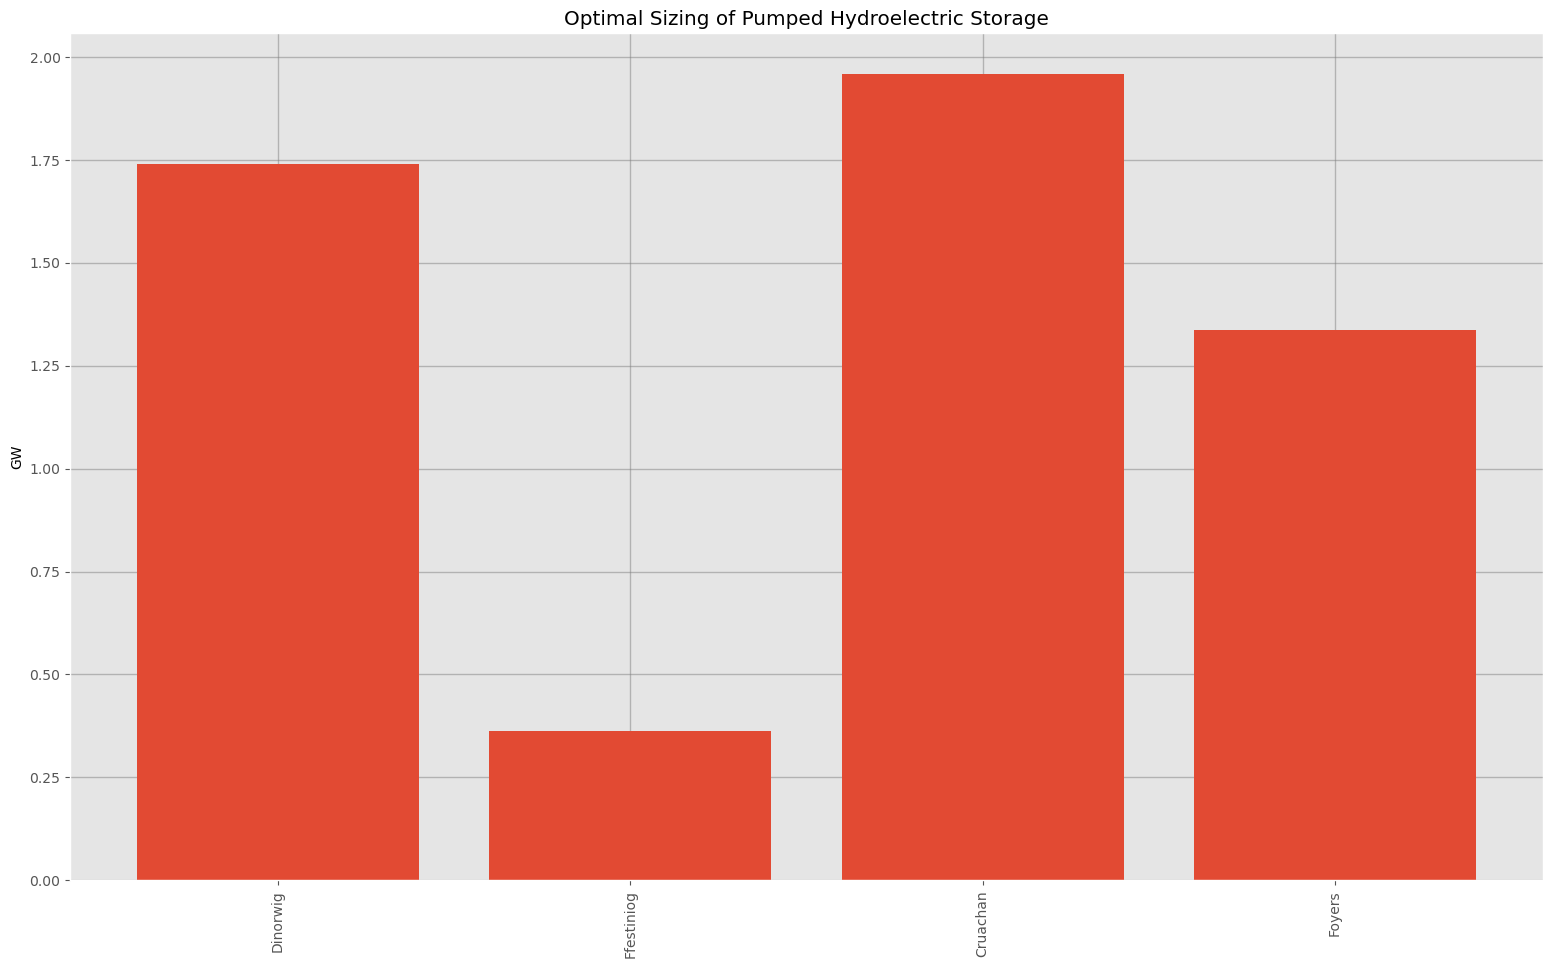

In [13]:
plt.figure(figsize=(19,11))
plt.bar(network.storage_units.index[:4], network.storage_units.p_nom_opt[:4].div(1e3).values)

plt.xticks(network.storage_units.index[:4], rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Optimal Sizing of Pumped Hydroelectric Storage')
plt.show()

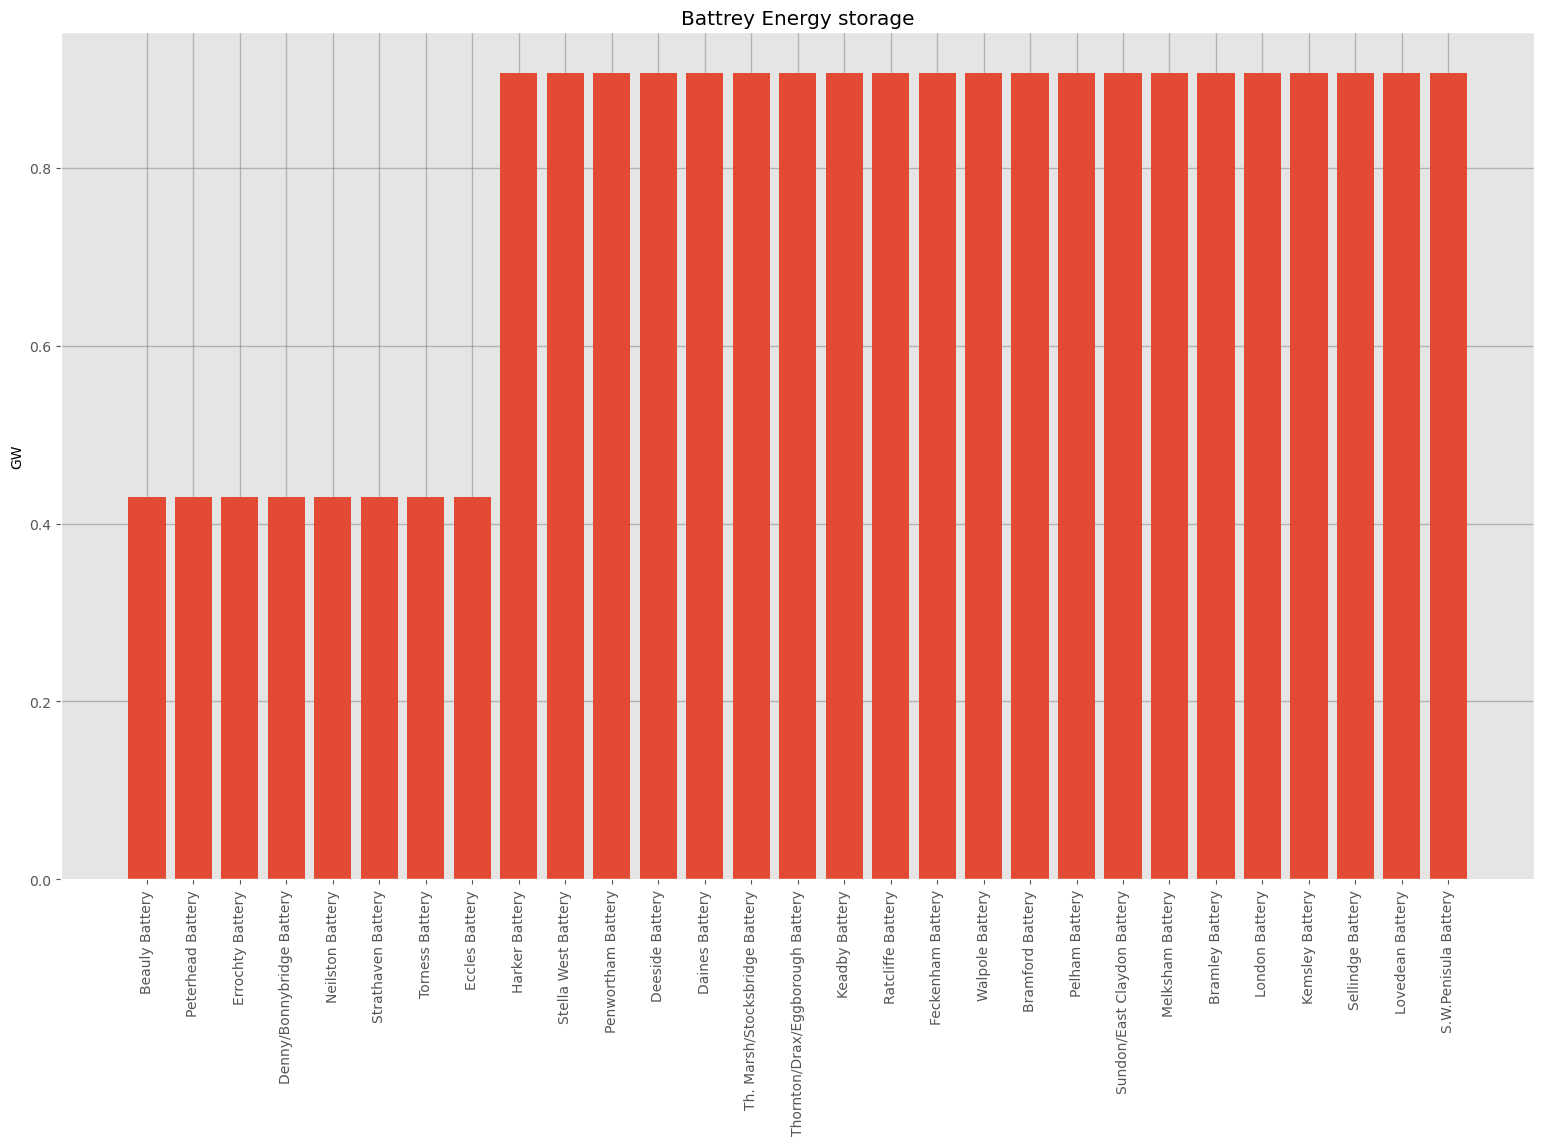

In [14]:
plt.figure(figsize=(19,11))
plt.bar(network.storage_units.index[4:33], network.storage_units.p_nom_opt[4:33].div(1e3).values)

plt.xticks(network.storage_units.index[4:33], rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Battrey Energy storage')
plt.show()

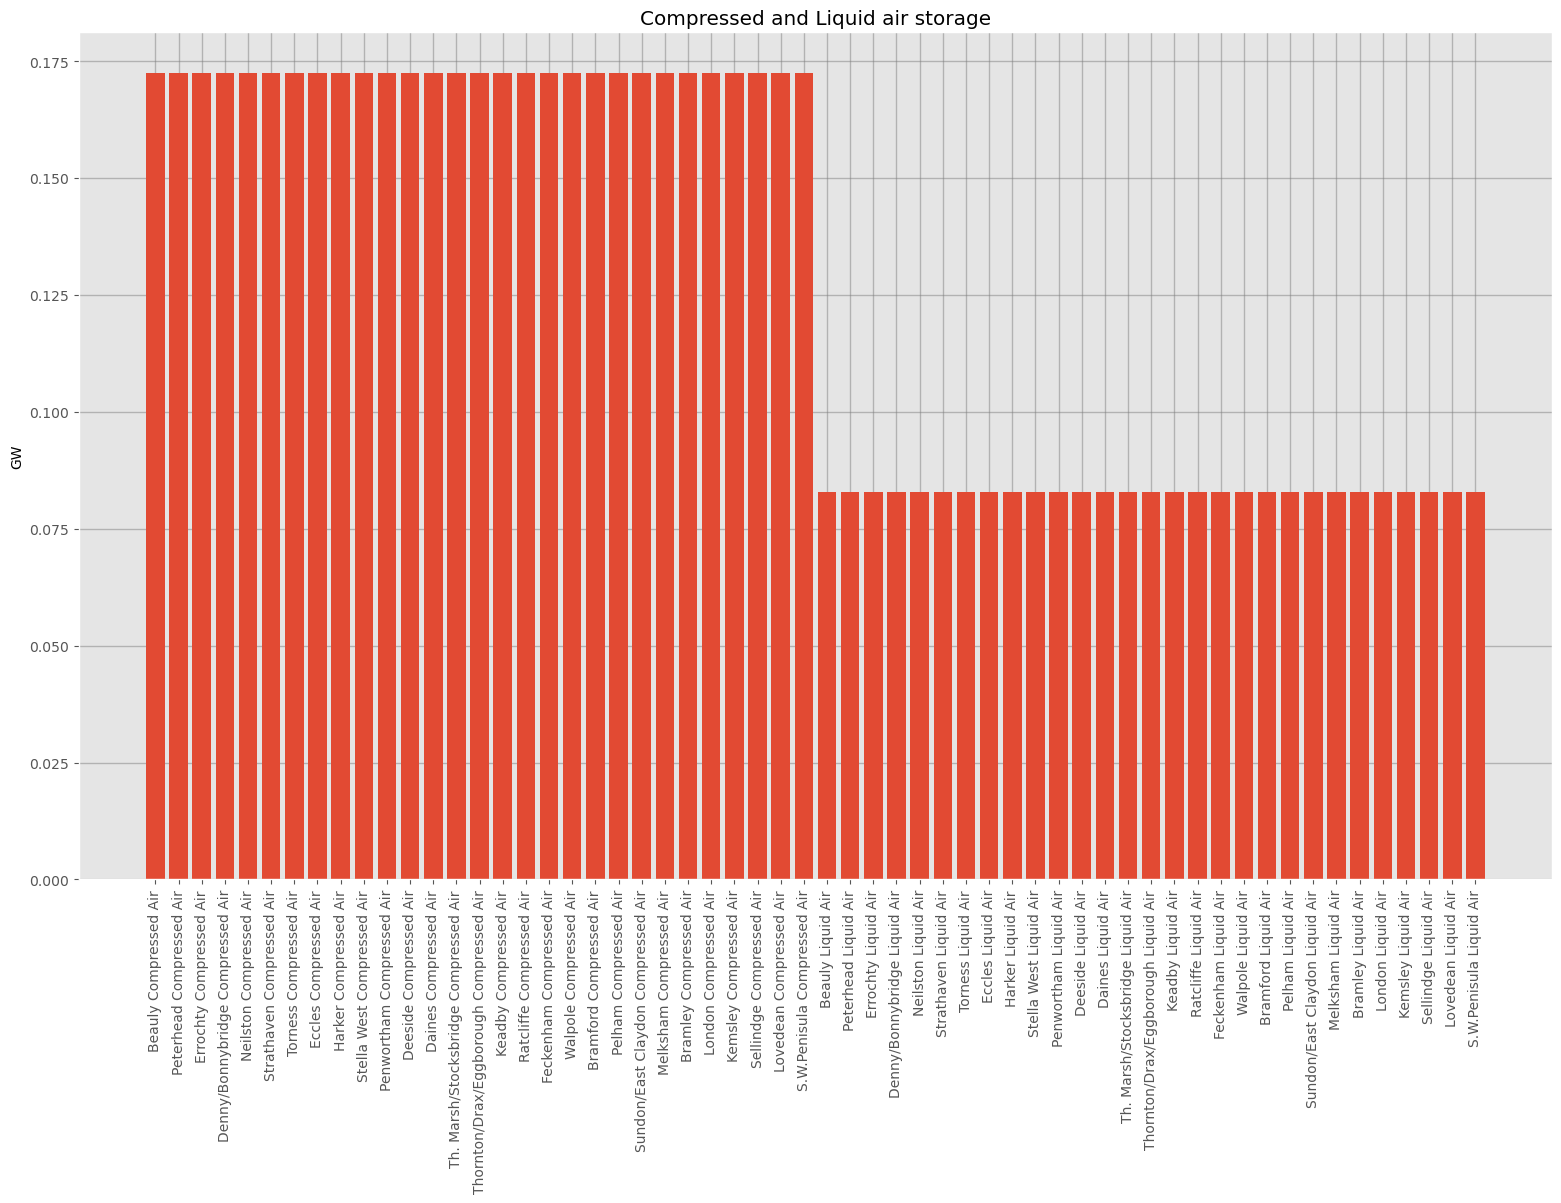

In [15]:
plt.figure(figsize=(19,11))
plt.bar(network.storage_units.index[33:91], network.storage_units.p_nom_opt[33:91].div(1e3).values)

plt.xticks(network.storage_units.index[33:91], rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Compressed and Liquid air storage')
plt.show()

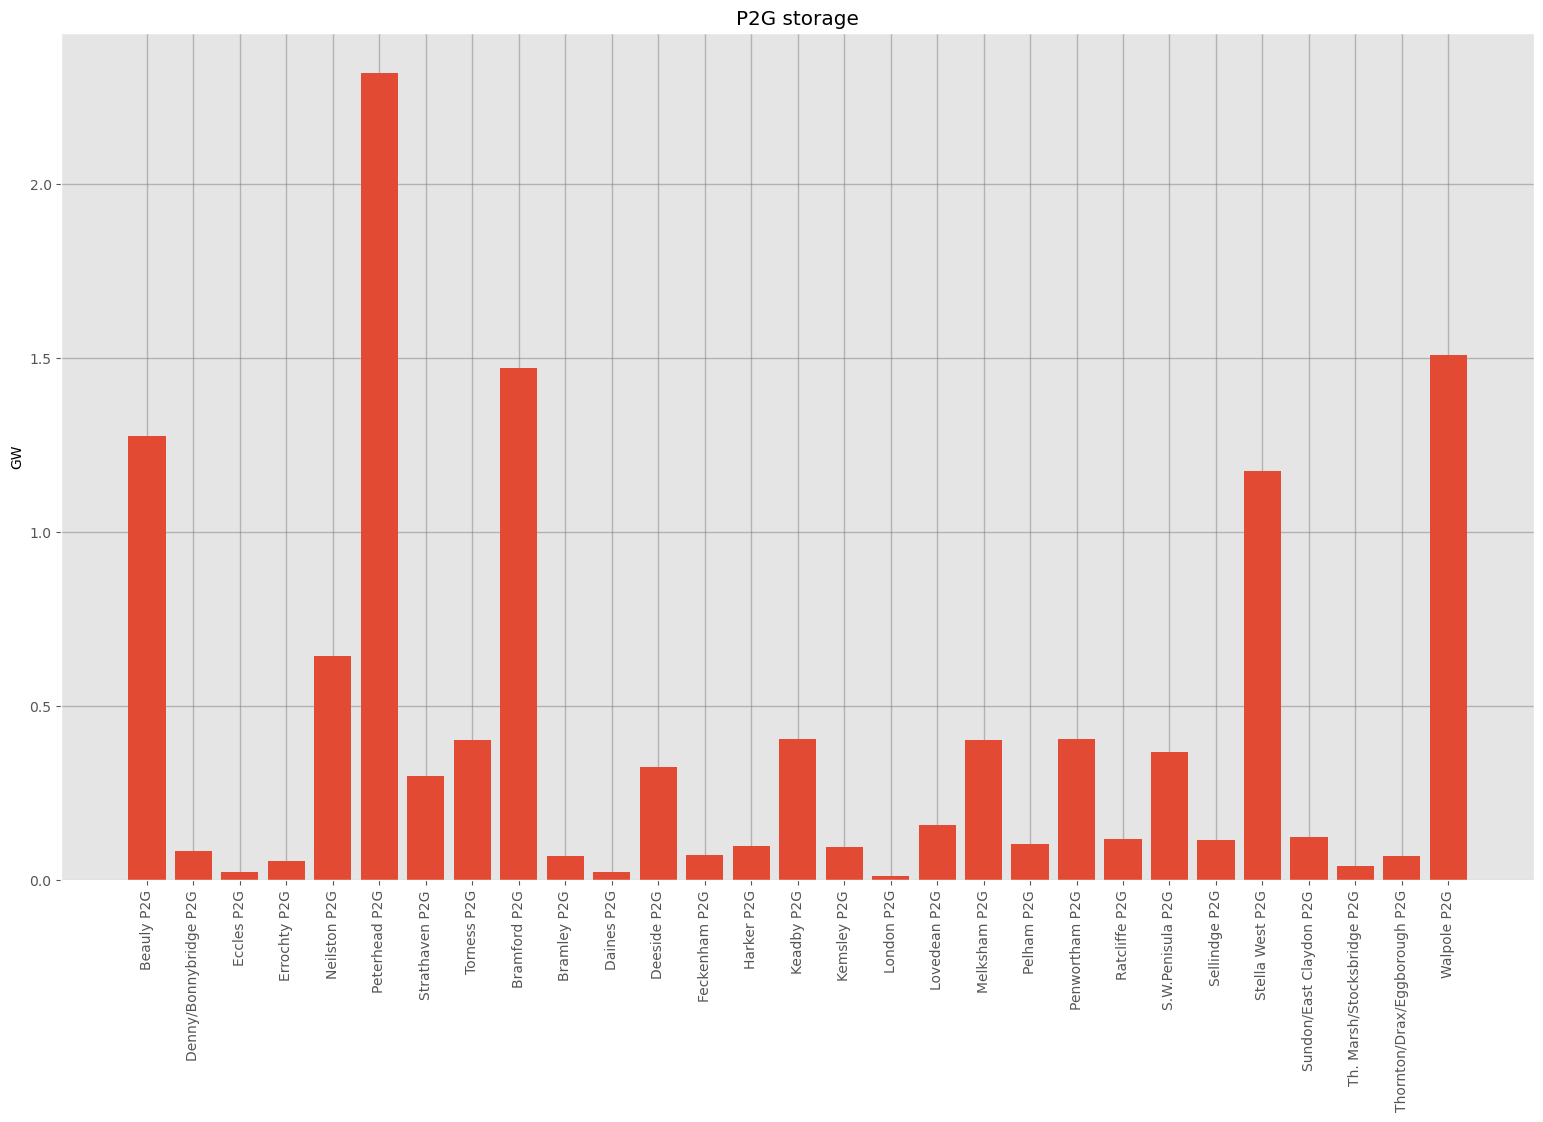

In [16]:
plt.figure(figsize=(19,11))
plt.bar(network.storage_units.index[91:120], network.storage_units.p_nom_opt[91:120].div(1e3).values)

plt.xticks(network.storage_units.index[91:120], rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('P2G storage')
plt.show()

## Power output by generation type

Group the generators by the carrier, and print their summed power outputs over the simulation period.

In [17]:
year=2035

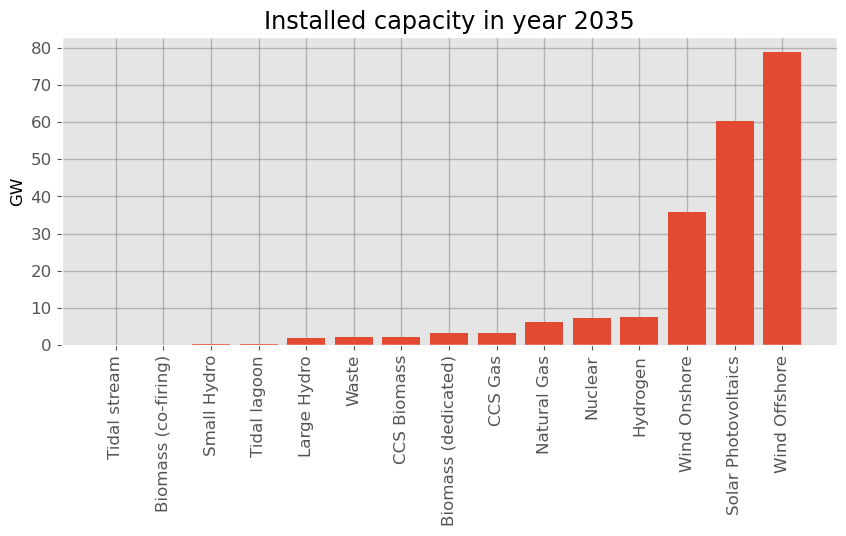

In [18]:
p_by_carrier = network.generators_t.p.groupby(
    network.generators.carrier, axis=1).sum()

storage_by_carrier = network.storage_units_t.p.groupby(
    network.storage_units.carrier, axis=1).sum()

# to show on graph set the negative storage values to zero
storage_by_carrier[storage_by_carrier < 0] = 0

p_by_carrier = pd.concat([p_by_carrier, storage_by_carrier], axis=1)

#imp = network.links_t.p0.copy()
#imp[imp < 0] = 0
#imp['Interconnectors Import'] = imp.sum(axis=1)
#interconnector_import = imp[['Interconnectors Import']]

#p_by_carrier = pd.concat([p_by_carrier, interconnector_import], axis=1)

#exp = network.links_t.p0.copy()
#exp[exp > 0] = 0
#exp['Interconnectors Export'] = exp.sum(axis=1)
#interconnector_export = exp[['Interconnectors Export']]

# group biomass stuff
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)'])

# rename the hydro bit
p_by_carrier = p_by_carrier.rename(
    columns={'Large Hydro': 'Hydro'})
p_by_carrier = p_by_carrier.rename(
    columns={'Interconnector': 'Interconnectors Import'})

generators_p_nom = network.generators.p_nom.groupby(
    network.generators.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom.drop('Unmet Load', inplace=True)
generators_p_nom.drop(generators_p_nom[generators_p_nom < 50].index, inplace=True)

plt.rcParams.update({'font.size': 12})
# bar chart
plt.figure(figsize=(10,4))
plt.bar(generators_p_nom.index, generators_p_nom.values / 1000)
plt.xticks(generators_p_nom.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Installed capacity in year ' + str(year))
plt.show()

Graph the power output of the different generation types...

Text(0.5, 0, '')

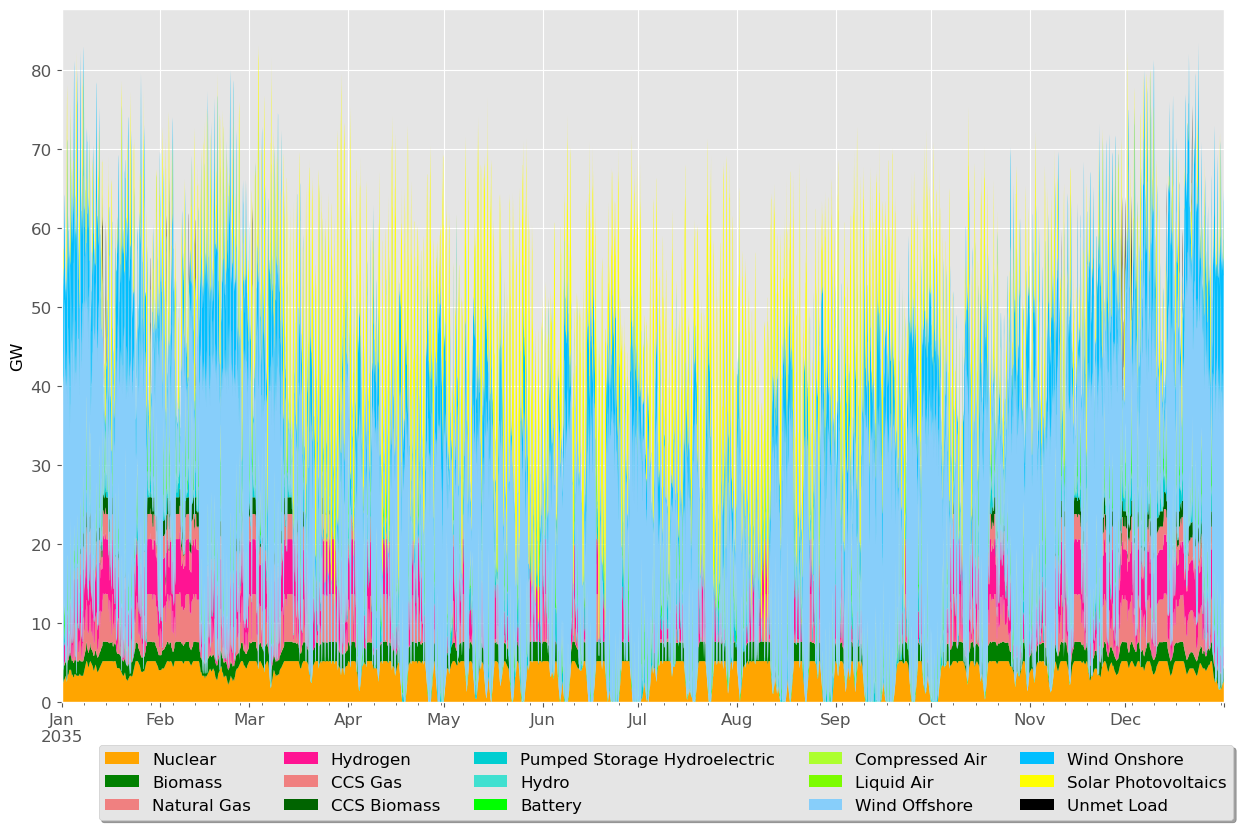

In [19]:
#cols = ["Nuclear", 'Biomass',
        #'Waste', "Oil", "Natural Gas",
       # 'Hydrogen', 'CCS Gas', 'CCS Biomass',
        #"Pumped Storage Hydroelectric", 'Hydro',
        #'Battery', 'Compressed Air', 'Liquid Air',
        #"Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        #'Interconnectors Import', 'Unmet Load'
       # ]
# ignore the import/export since the the highvoltage links are disrgearded

cols = ["Nuclear", 'Biomass',
        'Waste', "Oil", "Natural Gas",
        'Hydrogen', 'CCS Gas', 'CCS Biomass',
        "Pumped Storage Hydroelectric", 'Hydro',
        'Battery', 'Compressed Air', 'Liquid Air',
        "Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
         'Unmet Load'
        ]




p_by_carrier = p_by_carrier[cols]

p_by_carrier.drop(
    (p_by_carrier.max()[p_by_carrier.max() < 50.0]).index,
    axis=1, inplace=True)

colors = {"Coal": "grey",
          "Diesel/Gas oil": "black",
          "Diesel/gas Diesel/Gas oil": "black",
          'Oil': 'black',
          'Unmet Load': 'black',
          'Anaerobic Digestion': 'green',
          'Waste': 'chocolate',
          'Sewage Sludge Digestion': 'green',
          'Landfill Gas': 'green',
          'Biomass (dedicated)': 'green',
          'Biomass (co-firing)': 'green',
          'Biomass': 'green',
          'CCS Biomass': 'darkgreen',
          'Interconnectors Import': 'pink',
          'B6 import': 'pink',
          "Sour gas": "lightcoral",
          "Natural Gas": "lightcoral",
          'CCS Gas': "lightcoral",
          'Hydrogen': "deeppink",
          "Nuclear": "orange",
          'Shoreline Wave': 'aqua',
          'Tidal Barrage and Tidal Stream': 'aqua',
          'Hydro': "turquoise",
          "Large Hydro": "turquoise",
          "Small Hydro": "turquoise",
          "Pumped Storage Hydroelectric": "darkturquoise",
          'Battery': 'lime',
          'Compressed Air': 'greenyellow',
          'Liquid Air': 'lawngreen',
          "Wind Offshore": "lightskyblue",
          'Wind Onshore': 'deepskyblue',
          'Solar Photovoltaics': 'yellow'}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
(p_by_carrier / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier.columns])

# # stacked area plot of negative values, prepend column names with '_' such that they don't appear in the legend
# (interconnector_export / 1e3).plot.area(ax=ax, stacked=True, linewidth=0.)
# # rescale the y axis
# ax.set_ylim([(interconnector_export / 1e3).sum(axis=1).min(), (p_by_carrier / 1e3).sum(axis=1).max()])

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.52, -0.05),
          fancybox=True, shadow=True, ncol=5)

ax.set_ylabel("GW")

ax.set_xlabel("")

## Plotting storage

Graph the pumped hydro dispatch and state of charge...

Text(0.5, 0, '')

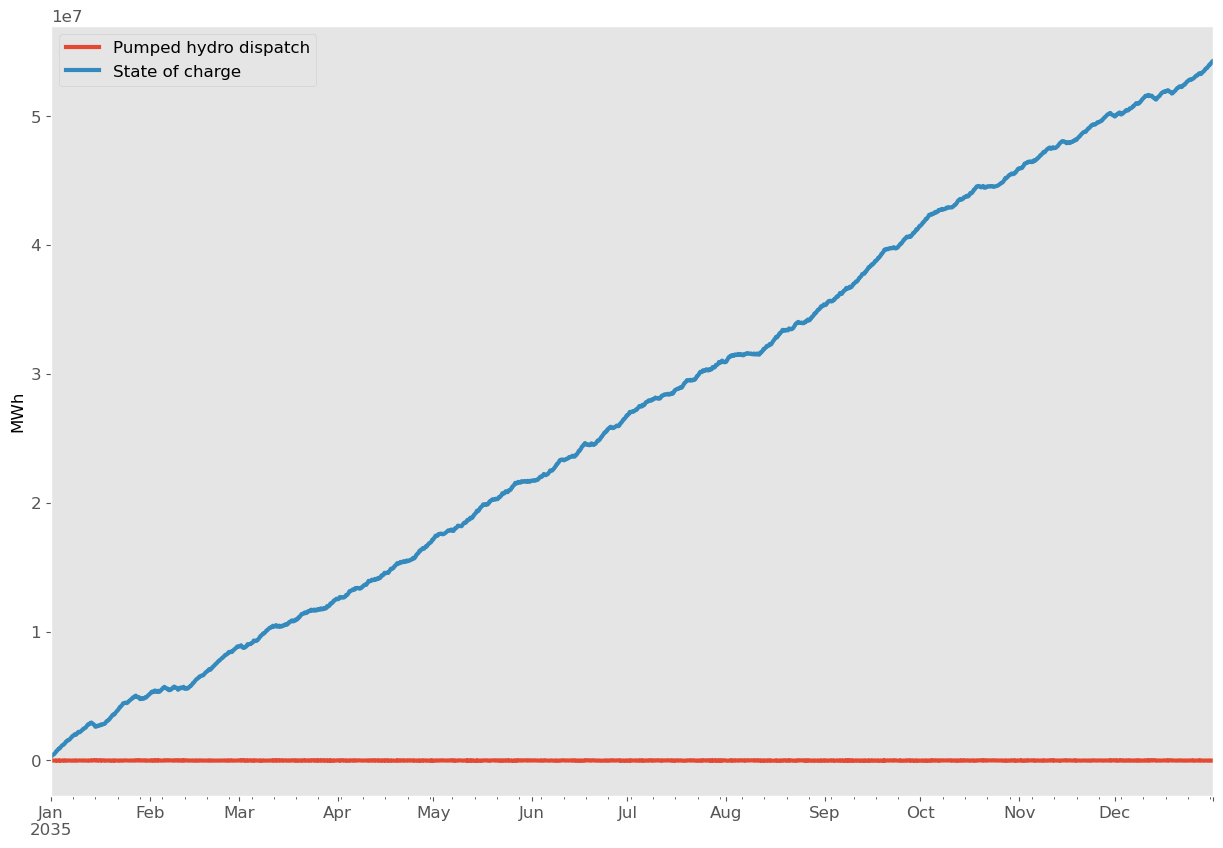

In [20]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage = network.storage_units_t.p.sum(axis=1)
state_of_charge = network.storage_units_t.state_of_charge.sum(axis=1)
p_storage.plot(label="Pumped hydro dispatch", ax=ax, linewidth=3)
state_of_charge.plot(label="State of charge", ax=ax, linewidth=3)

ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")

Let us plot the state of charge and dispatch for each type of storages separately

Text(0.5, 0, '')

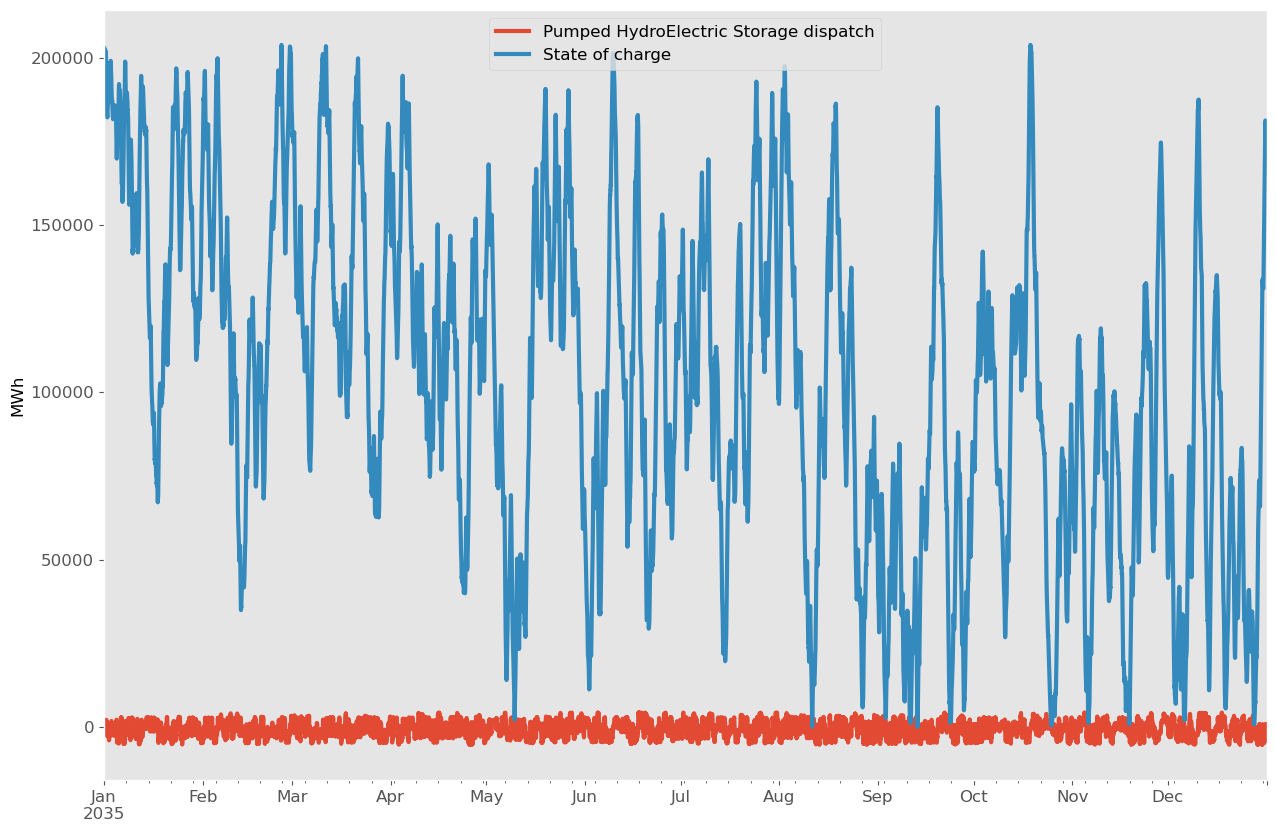

In [21]:
network.storage_units_t.state_of_charge.iloc[: , :4].sum(axis=1)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage_PumpedHydorES = network.storage_units_t.p.iloc[: , :4].sum(axis=1)

state_of_charge_PumpedHydroES = network.storage_units_t.state_of_charge.iloc[: , :4].sum(axis=1)


p_storage_PumpedHydorES.plot(label="Pumped HydroElectric Storage dispatch", ax=ax, linewidth=3)
state_of_charge_PumpedHydroES.plot(label="State of charge", ax=ax, linewidth=3)
ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")


Text(0.5, 0, '')

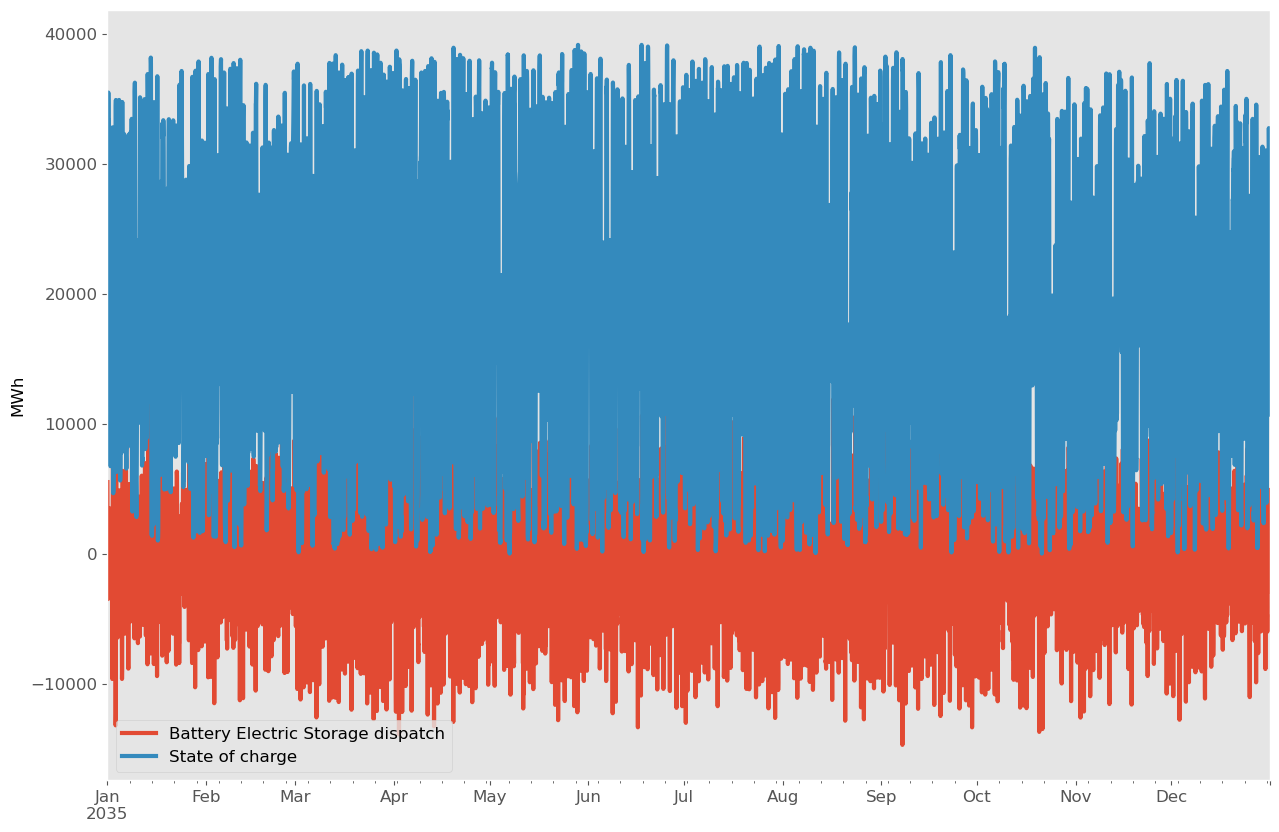

In [22]:
network.storage_units_t.state_of_charge.iloc[: , 4:33].sum(axis=1)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage_PumpedHydorES = network.storage_units_t.p.iloc[: , 4:33].sum(axis=1)

state_of_charge_PumpedHydroES = network.storage_units_t.state_of_charge.iloc[: , 4:33].sum(axis=1)


p_storage_PumpedHydorES.plot(label="Battery Electric Storage dispatch", ax=ax, linewidth=3)
state_of_charge_PumpedHydroES.plot(label="State of charge", ax=ax, linewidth=3)
ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")


Text(0.5, 0, '')

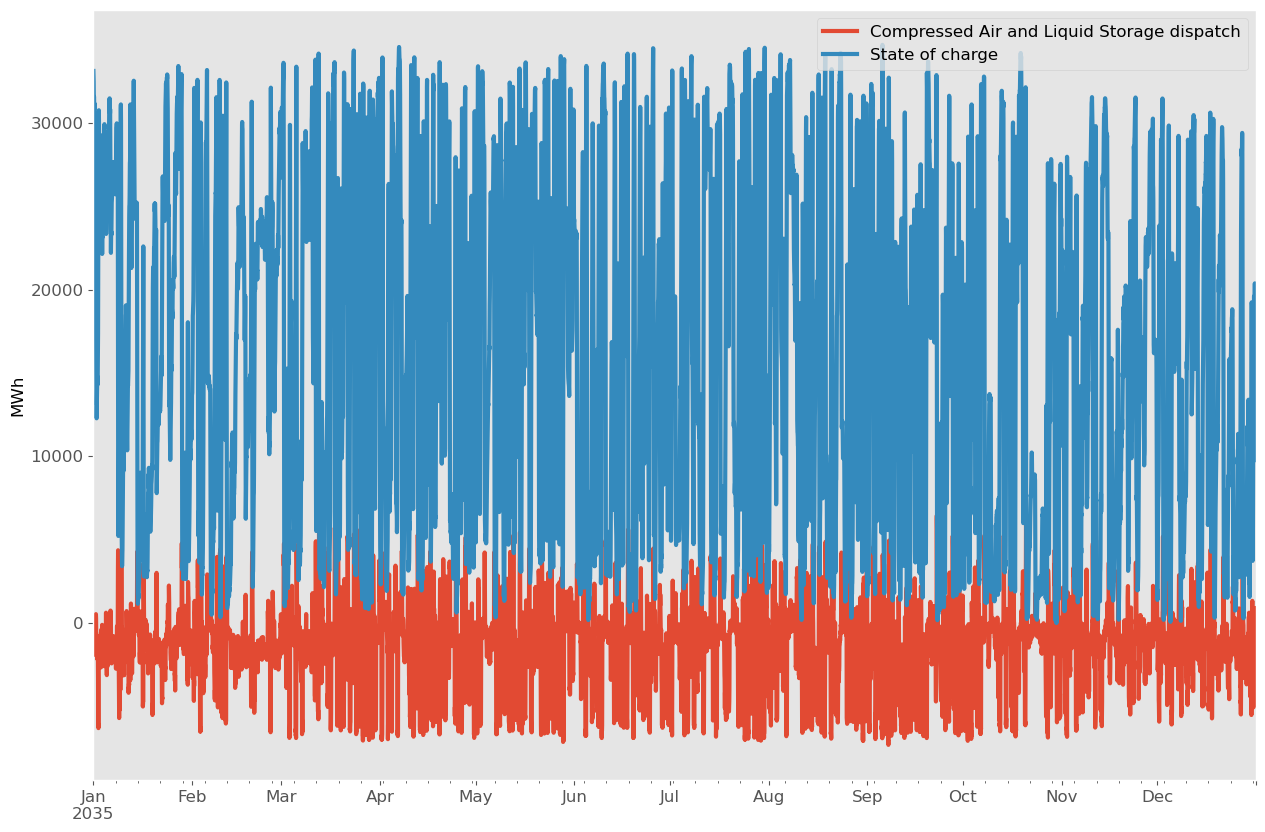

In [23]:
network.storage_units_t.state_of_charge.iloc[: , 33:91].sum(axis=1)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage_PumpedHydorES = network.storage_units_t.p.iloc[: , 33:91].sum(axis=1)

state_of_charge_PumpedHydroES = network.storage_units_t.state_of_charge.iloc[: , 33:91].sum(axis=1)


p_storage_PumpedHydorES.plot(label="Compressed Air and Liquid Storage dispatch", ax=ax, linewidth=3)
state_of_charge_PumpedHydroES.plot(label="State of charge", ax=ax, linewidth=3)
ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")


Text(0.5, 0, '')

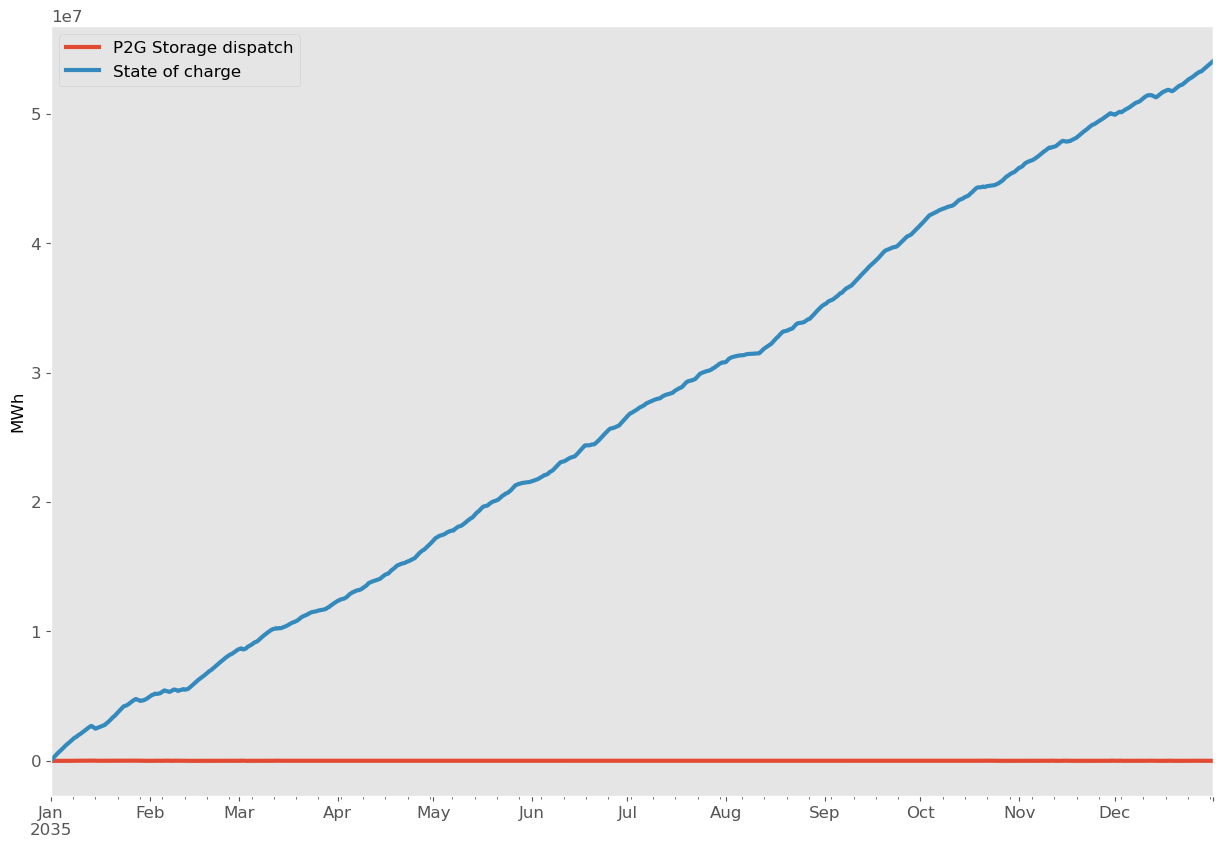

In [24]:
network.storage_units_t.state_of_charge.iloc[: , 91:120].sum(axis=1)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage_PumpedHydorES = network.storage_units_t.p.iloc[: , 91:120].sum(axis=1)

state_of_charge_PumpedHydroES = network.storage_units_t.state_of_charge.iloc[: , 91:120].sum(axis=1)


p_storage_PumpedHydorES.plot(label="P2G Storage dispatch", ax=ax, linewidth=3)
state_of_charge_PumpedHydroES.plot(label="State of charge", ax=ax, linewidth=3)
ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")


In [ ]:
# then solve the model
#network.optimize.solve_model(solver_name='gurobi')
network.optimize(solver_name='gurobi')

C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_up` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_down` to match existing coordinates.
  warnings.warn(
INFO:linopy.model: Solve linear problem using Gurobi solver
Writing variables.: 100%|████████████████████████████████████████████████████████████████| 6/6 [00:16<00:00,  2.79s/it]


Read LP format model from file C:\Users\salene\AppData\Local\Temp\linopy-problem-gn04ma4m.lp
Reading time = 62.06 seconds
obj: 25105296 rows, 7805160 columns, 44209872 nonzeros
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 25105296 rows, 7805160 columns and 44209872 nonzeros
Model fingerprint: 0x96205687
Coefficient statistics:
  Matrix range     [6e-05, 1e+00]
  Objective range  [1e+00, 1e+09]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e-07, 2e+12]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 23072988 rows and 0 columns (presolve time = 5s) ...
Presolve removed 23072988 rows and 831577 columns (presolve time = 11s) ...
Presolve removed 23072988 rows and 2317355 columns (presolve time = 15s

  85   4.33664925e+14  4.33664697e+14  6.76e-07 6.17e-06  2.26e+01   476s
  86   4.33664916e+14  4.33664720e+14  6.67e-07 5.72e-06  1.94e+01   481s
  87   4.33664897e+14  4.33664737e+14  6.77e-07 5.72e-06  1.58e+01   486s
  88   4.33664889e+14  4.33664750e+14  6.57e-07 5.72e-06  1.38e+01   492s
  89   4.33664881e+14  4.33664764e+14  6.47e-07 5.72e-06  1.16e+01   497s
  90   4.33664873e+14  4.33664774e+14  5.84e-07 5.72e-06  9.80e+00   502s
  91   4.33664867e+14  4.33664779e+14  6.58e-07 6.27e-06  8.76e+00   508s
  92   4.33664864e+14  4.33664783e+14  6.74e-07 5.72e-06  7.95e+00   513s
  93   4.33664861e+14  4.33664787e+14  5.93e-07 7.63e-06  7.31e+00   519s
  94   4.33664856e+14  4.33664794e+14  6.17e-07 6.20e-06  6.14e+00   524s
  95   4.33664852e+14  4.33664798e+14  8.38e-07 5.74e-06  5.31e+00   529s
  96   4.33664850e+14  4.33664803e+14  7.65e-07 5.72e-06  4.67e+00   534s
  97   4.33664848e+14  4.33664808e+14  7.19e-07 6.05e-06  3.94e+00   539s
  98   4.33664845e+14  4.33664813e+14 

 2806978 PPushes remaining with PInf 2.7446444e+05              2333s
 2804686 PPushes remaining with PInf 2.7446113e+05              2340s
 2802106 PPushes remaining with PInf 2.7423519e+05              2346s
 2799436 PPushes remaining with PInf 2.7421099e+05              2352s
 2797394 PPushes remaining with PInf 2.7417065e+05              2358s
 2794550 PPushes remaining with PInf 2.7415616e+05              2364s
 2791892 PPushes remaining with PInf 2.7413883e+05              2371s
 2790356 PPushes remaining with PInf 2.7411294e+05              2376s
 2788351 PPushes remaining with PInf 2.7410744e+05              2385s
 2784129 PPushes remaining with PInf 2.7408987e+05              2395s
 2782086 PPushes remaining with PInf 2.7403509e+05              2400s
 2780515 PPushes remaining with PInf 2.7401217e+05              2405s
 2778651 PPushes remaining with PInf 2.7401117e+05              2413s
 2776324 PPushes remaining with PInf 2.7400575e+05              2419s
 2773835 PPushes rem

 2562126 PPushes remaining with PInf 2.6310932e+05              5103s
 2560042 PPushes remaining with PInf 2.6303389e+05              5126s
 2557958 PPushes remaining with PInf 2.6290252e+05              5150s
 2555391 PPushes remaining with PInf 2.6282072e+05              5179s
 2553301 PPushes remaining with PInf 2.6259642e+05              5203s
 2551109 PPushes remaining with PInf 2.6245475e+05              5227s
 2548693 PPushes remaining with PInf 2.6239905e+05              5255s
 2546411 PPushes remaining with PInf 2.6231171e+05              5281s
 2544408 PPushes remaining with PInf 2.6218136e+05              5304s
 2542267 PPushes remaining with PInf 2.6215485e+05              5327s
 2540344 PPushes remaining with PInf 2.6210736e+05              5350s
 2538255 PPushes remaining with PInf 2.6203808e+05              5373s
 2536198 PPushes remaining with PInf 2.6187999e+05              5397s
 2533986 PPushes remaining with PInf 2.6163409e+05              5422s
 2531727 PPushes rem

 2241643 PPushes remaining with PInf 2.4557398e+05              7966s
 2238646 PPushes remaining with PInf 2.4555445e+05              7990s
 2235795 PPushes remaining with PInf 2.4555065e+05              8016s
 2232851 PPushes remaining with PInf 2.4553007e+05              8036s
 2229633 PPushes remaining with PInf 2.4539382e+05              8062s
 2226986 PPushes remaining with PInf 2.4538299e+05              8082s
 2224012 PPushes remaining with PInf 2.4537526e+05              8102s
 2220628 PPushes remaining with PInf 2.4535282e+05              8123s
 2217724 PPushes remaining with PInf 2.4531124e+05              8143s
 2214727 PPushes remaining with PInf 2.4528191e+05              8162s
 2211918 PPushes remaining with PInf 2.4523416e+05              8179s
 2208993 PPushes remaining with PInf 2.4521122e+05              8196s
 2205918 PPushes remaining with PInf 2.4516041e+05              8212s
 2202652 PPushes remaining with PInf 2.4512148e+05              8230s
 2199384 PPushes rem

 1938696 PPushes remaining with PInf 2.3348887e+05              9813s
 1936652 PPushes remaining with PInf 2.3346685e+05              9824s
 1934896 PPushes remaining with PInf 2.3345014e+05              9833s
 1933251 PPushes remaining with PInf 2.3344049e+05              9840s
 1931577 PPushes remaining with PInf 2.3342257e+05              9846s
 1929993 PPushes remaining with PInf 2.3340507e+05              9854s
 1928529 PPushes remaining with PInf 2.3339839e+05              9861s
 1927004 PPushes remaining with PInf 2.3339294e+05              9870s
 1925629 PPushes remaining with PInf 2.3334671e+05              9875s
 1923070 PPushes remaining with PInf 2.3328712e+05              9885s
 1921847 PPushes remaining with PInf 2.3327232e+05              9890s
 1919837 PPushes remaining with PInf 2.3267825e+05              9897s
 1918144 PPushes remaining with PInf 2.2175239e+05              9902s
 1917266 PPushes remaining with PInf 2.2145150e+05              9905s
 1915536 PPushes rem

 1588754 PPushes remaining with PInf 7.8933395e+04             12211s
 1586800 PPushes remaining with PInf 7.8879814e+04             12227s
 1584748 PPushes remaining with PInf 7.8864140e+04             12246s
 1582758 PPushes remaining with PInf 7.8813704e+04             12264s
 1580777 PPushes remaining with PInf 7.8730863e+04             12280s
 1578778 PPushes remaining with PInf 7.8619564e+04             12294s
 1576356 PPushes remaining with PInf 7.8560417e+04             12313s
 1574211 PPushes remaining with PInf 7.8550227e+04             12330s
 1572142 PPushes remaining with PInf 7.8066662e+04             12350s
 1569881 PPushes remaining with PInf 7.8029053e+04             12370s
 1567506 PPushes remaining with PInf 7.8014403e+04             12389s
 1565357 PPushes remaining with PInf 7.7984419e+04             12407s
 1563168 PPushes remaining with PInf 7.7954015e+04             12427s
 1560941 PPushes remaining with PInf 7.7943911e+04             12445s
 1558600 PPushes rem

 1359092 PPushes remaining with PInf 7.2154820e+04             14418s
 1357592 PPushes remaining with PInf 7.2122358e+04             14437s
 1356147 PPushes remaining with PInf 7.2097286e+04             14453s
 1354470 PPushes remaining with PInf 7.2094188e+04             14472s
 1353011 PPushes remaining with PInf 7.2084334e+04             14487s
 1351449 PPushes remaining with PInf 7.2076937e+04             14505s
 1349934 PPushes remaining with PInf 7.2023154e+04             14521s
 1348233 PPushes remaining with PInf 7.2015640e+04             14541s
 1346668 PPushes remaining with PInf 7.2010880e+04             14561s
 1345179 PPushes remaining with PInf 7.2005857e+04             14579s
 1343621 PPushes remaining with PInf 7.1973827e+04             14598s
 1341944 PPushes remaining with PInf 7.1791615e+04             14620s
 1340282 PPushes remaining with PInf 7.1767187e+04             14641s
 1338603 PPushes remaining with PInf 7.1757764e+04             14661s
 1337000 PPushes rem

 1171167 PPushes remaining with PInf 6.9934746e+04             16656s
 1169580 PPushes remaining with PInf 6.9931405e+04             16674s
 1168017 PPushes remaining with PInf 6.9924697e+04             16692s
 1166521 PPushes remaining with PInf 6.9693555e+04             16708s
 1165073 PPushes remaining with PInf 6.9651135e+04             16725s
 1163558 PPushes remaining with PInf 6.9642553e+04             16742s
 1161974 PPushes remaining with PInf 6.9632631e+04             16760s
 1160307 PPushes remaining with PInf 6.9629028e+04             16778s
 1158706 PPushes remaining with PInf 6.9628025e+04             16794s
 1157208 PPushes remaining with PInf 6.9615157e+04             16809s
 1155557 PPushes remaining with PInf 6.9570447e+04             16827s
 1153731 PPushes remaining with PInf 6.9565144e+04             16844s
 1151625 PPushes remaining with PInf 6.9564539e+04             16865s
 1149990 PPushes remaining with PInf 6.9563270e+04             16882s
 1148261 PPushes rem

  976004 PPushes remaining with PInf 6.8142093e+04             18771s
  974388 PPushes remaining with PInf 6.8141375e+04             18785s
  972890 PPushes remaining with PInf 6.8138496e+04             18798s
  971409 PPushes remaining with PInf 6.8118880e+04             18811s
  970014 PPushes remaining with PInf 6.8012109e+04             18825s
  968393 PPushes remaining with PInf 6.7998596e+04             18839s
  966637 PPushes remaining with PInf 6.7994729e+04             18853s
  964753 PPushes remaining with PInf 6.7981141e+04             18866s
  962847 PPushes remaining with PInf 6.7947173e+04             18877s
  960711 PPushes remaining with PInf 6.7945548e+04             18888s
  958323 PPushes remaining with PInf 6.7939896e+04             18897s
  955655 PPushes remaining with PInf 6.7937217e+04             18907s
  952722 PPushes remaining with PInf 6.7932566e+04             18915s
  949671 PPushes remaining with PInf 6.7931528e+04             18924s
  946619 PPushes rem

  693764 PPushes remaining with PInf 5.7256773e+04             20393s
  692388 PPushes remaining with PInf 5.7249593e+04             20416s
  691021 PPushes remaining with PInf 5.7236361e+04             20440s
  689610 PPushes remaining with PInf 5.7232239e+04             20460s
  688149 PPushes remaining with PInf 5.7231122e+04             20479s
  686776 PPushes remaining with PInf 5.7229230e+04             20498s
  685400 PPushes remaining with PInf 5.7225664e+04             20519s
  684033 PPushes remaining with PInf 5.7221510e+04             20540s
  682720 PPushes remaining with PInf 5.7217654e+04             20562s
  681413 PPushes remaining with PInf 5.7180694e+04             20585s
  680081 PPushes remaining with PInf 5.7169850e+04             20608s
  678839 PPushes remaining with PInf 5.7164686e+04             20630s
  677553 PPushes remaining with PInf 5.7158193e+04             20653s
  676277 PPushes remaining with PInf 5.7152449e+04             20674s
  674896 PPushes rem

## Plotting line loading

Look at the line loading stats and graph...

In [ ]:
now = network.snapshots[60]

print("With the linear load flow, there is the following per unit loading:")
loading = network.lines_t.p0.loc[now] / network.lines.s_nom
loading.describe()

In [ ]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(15, 17)

network.plot(ax=ax, line_colors=abs(loading), line_cmap=plt.cm.jet, title="Line loading")

## Plotting locational marginal prices

In [ ]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(20, 10)

network.plot(ax=ax, line_widths=pd.Series(0.5, network.lines.index))
plt.hexbin(network.buses.x, network.buses.y,
           gridsize=20,
           C=network.buses_t.marginal_price.loc[now],
           cmap=plt.cm.jet)

# for some reason the colorbar only works with graphs plt.plot
# and must be attached plt.colorbar

cb = plt.colorbar()
cb.set_label('Locational Marginal Price (£/MWh)')

In [ ]:
network.buses_t.marginal_price

## Plotting curtailment

In [ ]:
carrier = "Wind Onshore"

capacity = network.generators.groupby("carrier").sum().at[carrier, "p_nom"]
p_available = network.generators_t.p_max_pu.multiply(network.generators["p_nom"])
p_available_by_carrier = p_available.groupby(network.generators.carrier, axis=1).sum()
p_curtailed_by_carrier = p_available_by_carrier - p_by_carrier
p_df = pd.DataFrame({carrier + " available": p_available_by_carrier[carrier],
                     carrier + " dispatched": p_by_carrier[carrier],
                     carrier + " curtailed": p_curtailed_by_carrier[carrier]})

p_df[carrier + " capacity"] = capacity
p_df["Wind Onshore curtailed"][p_df["Wind Onshore curtailed"] < 0.] = 0.
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
p_df[[carrier + " dispatched", carrier + " curtailed"]].plot(kind="area", ax=ax, linewidth=0)
# p_df[[carrier + " available", carrier + " capacity"]].plot(ax=ax, linewidth=0)

ax.set_xlabel("")
ax.set_ylabel("Power [MW]")
ax.legend()

In [ ]:
carrier = "Wind Offshore"

capacity = network.generators.groupby("carrier").sum().at[carrier, "p_nom"]
p_available = network.generators_t.p_max_pu.multiply(network.generators["p_nom"])
p_available_by_carrier = p_available.groupby(network.generators.carrier, axis=1).sum()
p_curtailed_by_carrier = p_available_by_carrier - p_by_carrier
p_df = pd.DataFrame({carrier + " available": p_available_by_carrier[carrier],
                     carrier + " dispatched": p_by_carrier[carrier],
                     carrier + " curtailed": p_curtailed_by_carrier[carrier]})

p_df[carrier + " capacity"] = capacity
p_df["Wind Offshore curtailed"][p_df["Wind Offshore curtailed"] < 0.] = 0.
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
p_df[[carrier + " dispatched", carrier + " curtailed"]].plot(kind="area", ax=ax, linewidth=0)
# p_df[[carrier + " available", carrier + " capacity"]].plot(ax=ax, linewidth=0)

ax.set_xlabel("")
ax.set_ylabel("Power [MW]")
ax.legend()